# **Importing Libraries**

In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

# **Reading data**

In [10]:
data = pd.read_csv('loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Univariate Analysis**

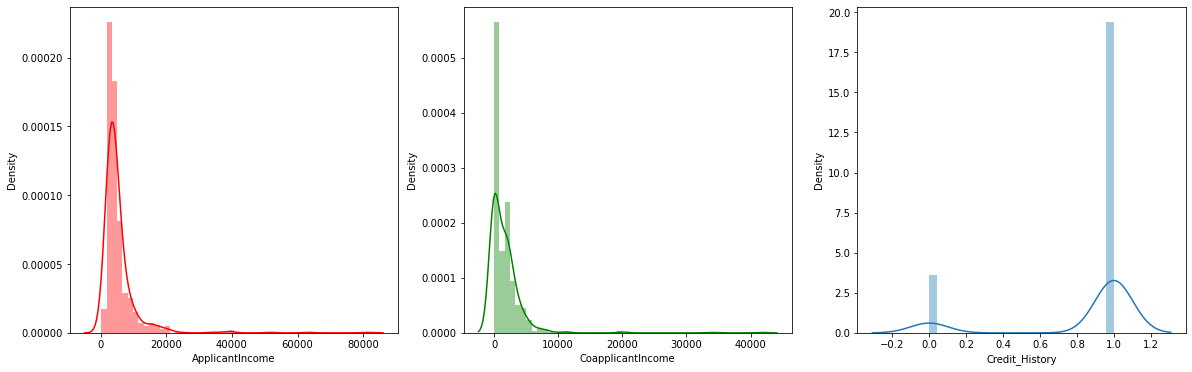

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(data['ApplicantIncome'],color ='r')
plt.subplot(132)
sns.distplot(data['CoapplicantIncome'],color ='g')
plt.subplot(133)
sns.distplot(data['Credit_History'])
plt.show()

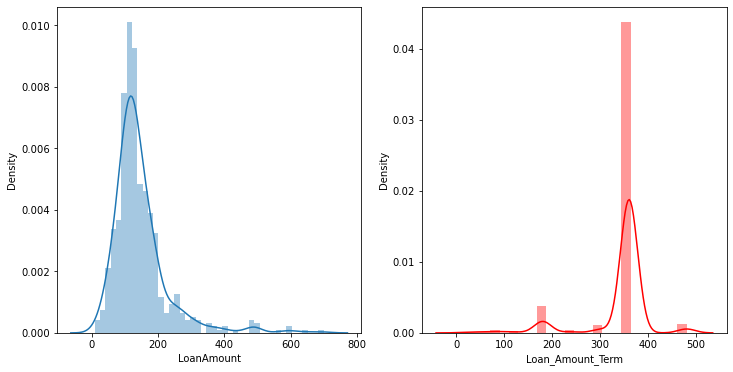

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(data['LoanAmount'])
plt.subplot(122)
sns.distplot(data['Loan_Amount_Term'],color='r')
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

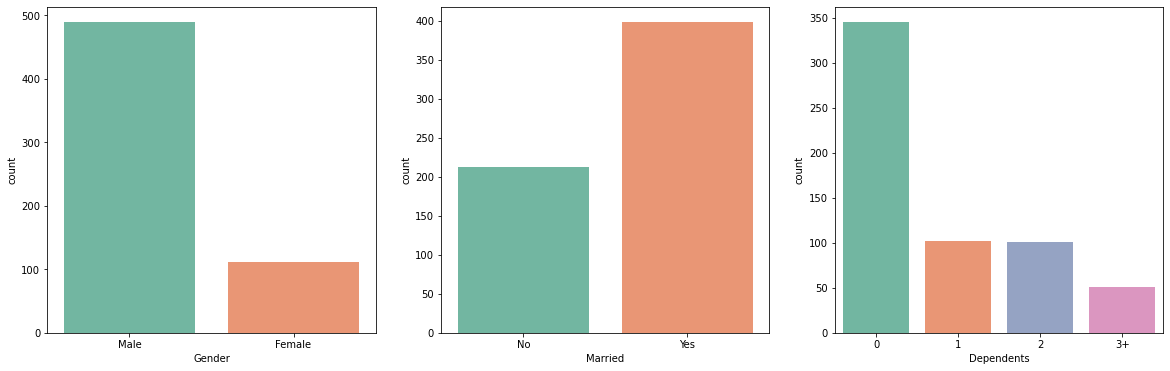

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.countplot(data.Gender , data = data, palette = 'Set2')
plt.subplot(132)
sns.countplot(data.Married , data = data, palette = 'Set2')
plt.subplot(133)
sns.countplot(data.Dependents , data = data, palette = 'Set2')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

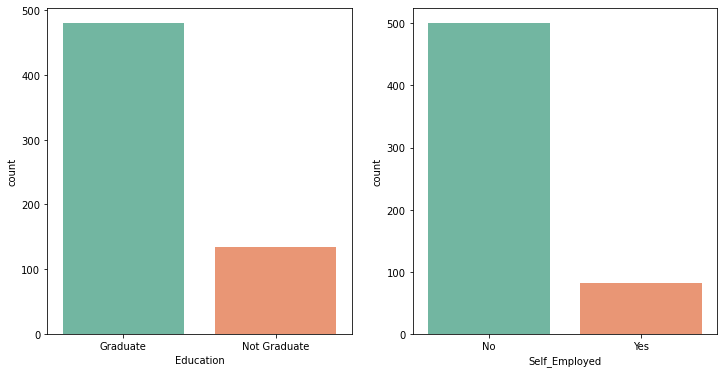

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(data.Education , data = data, palette = 'Set2')
plt.subplot(122)
sns.countplot(data.Self_Employed , data = data, palette = 'Set2')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

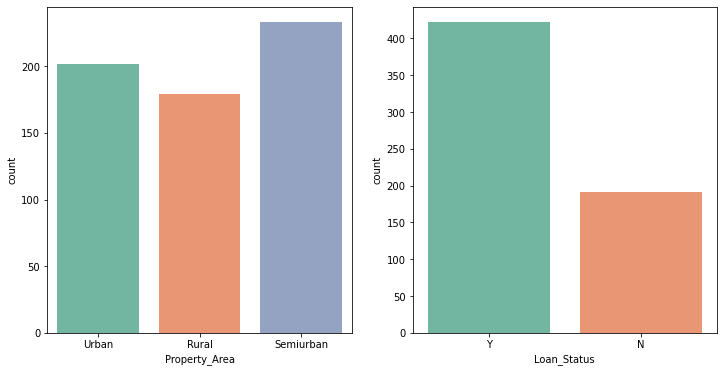

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(data.Property_Area , data = data, palette = 'Set2')
plt.subplot(122)
sns.countplot(data.Loan_Status , data = data, palette = 'Set2')

# **Bivariate Analysis**

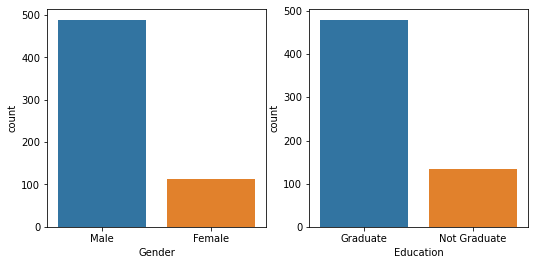

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

**Gender**

<Figure size 864x720 with 0 Axes>

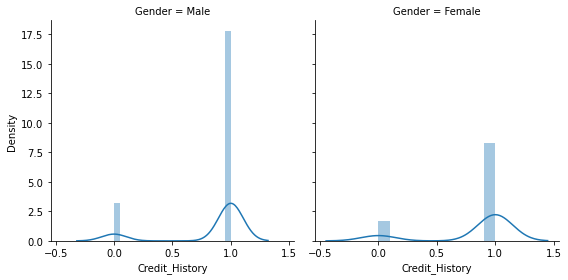

In [17]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = data, col= 'Gender', height = 4)
g.map(sns.distplot, 'Credit_History')

**Education**

<Figure size 864x720 with 0 Axes>

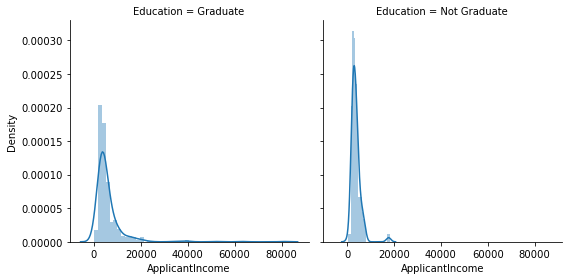

In [18]:
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = data, col= 'Education', height = 4)
g.map(sns.distplot, 'ApplicantIncome')

**Loan_Status vs Credit_History**

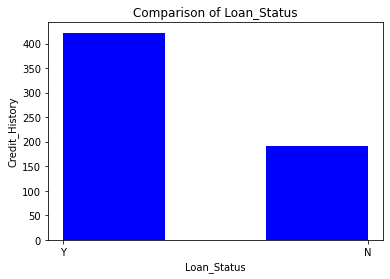

In [19]:
plt.hist(x = data.Loan_Status, bins = 3, color="blue")
plt.title('Comparison of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')
plt.show()

**Property_Area vs ApplicantIncome**

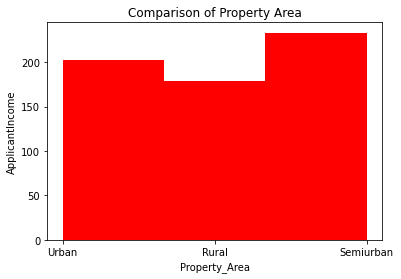

In [20]:
plt.hist(x = data.Property_Area, bins = 3, color="red")
plt.title('Comparison of Property Area')
plt.xlabel('Property_Area')
plt.ylabel('ApplicantIncome')
plt.show()

# **Multivariate Analysis**

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

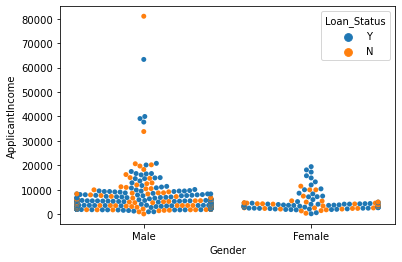

In [21]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue = data['Loan_Status'])

**Credit_History vs ApplicantIncome and Gender**

Text(0.5, 1.0, 'Credit_History vs ApplicantIncome and Gender')

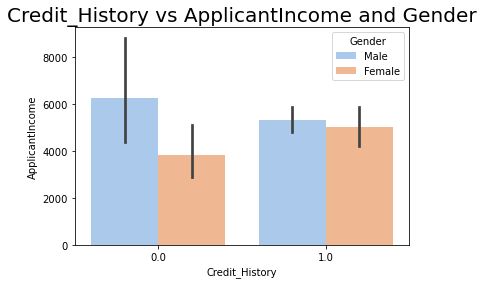

In [22]:
sns.barplot(data['Credit_History'], data['ApplicantIncome'], hue = data['Gender'], palette = 'pastel')
plt.title('Credit_History vs ApplicantIncome and Gender', fontsize = 20)

**Visualizations Loan_Status vs Loan_Amount_Term vs Gender**

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

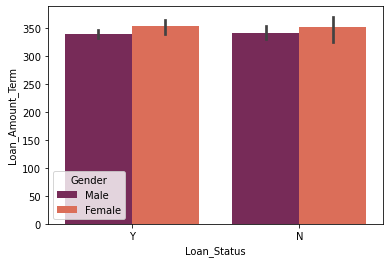

In [23]:
sns.barplot(data.Loan_Status,data.Loan_Amount_Term,hue=data.Gender, palette="rocket")

**Pairplot - ApplicantIncome**

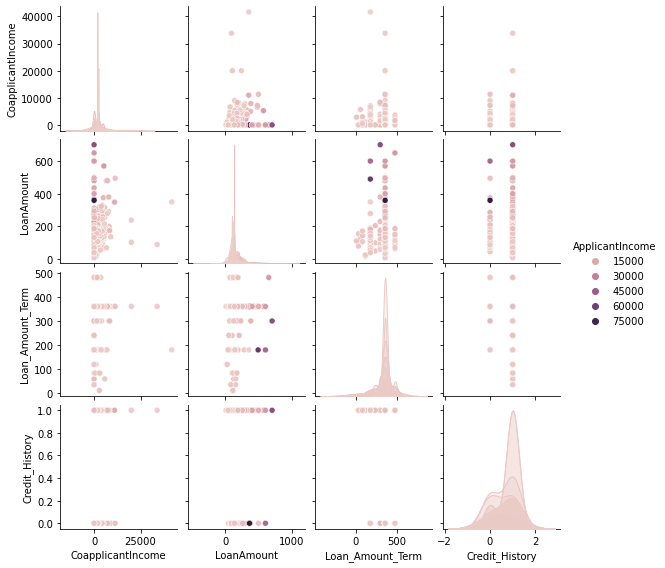

In [24]:
sns.pairplot(data,hue='ApplicantIncome',size=2)

**Pairplot - Credit_History**

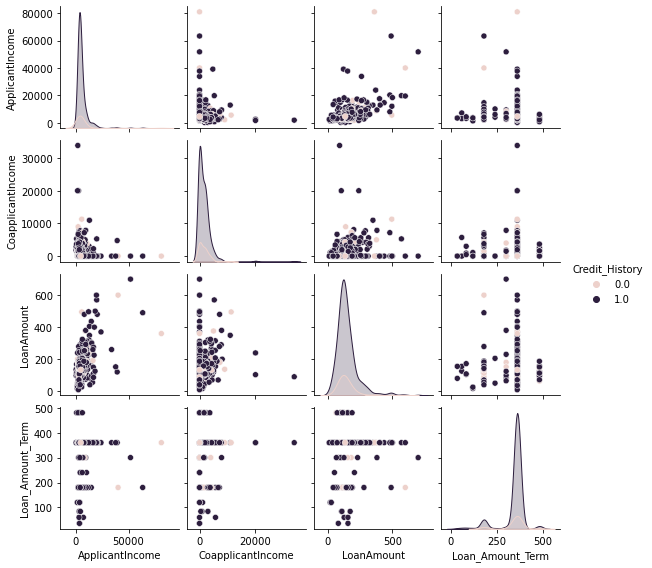

In [25]:
sns.pairplot(data,hue='Credit_History',size=2)

**Histogram Distribution for different features**

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

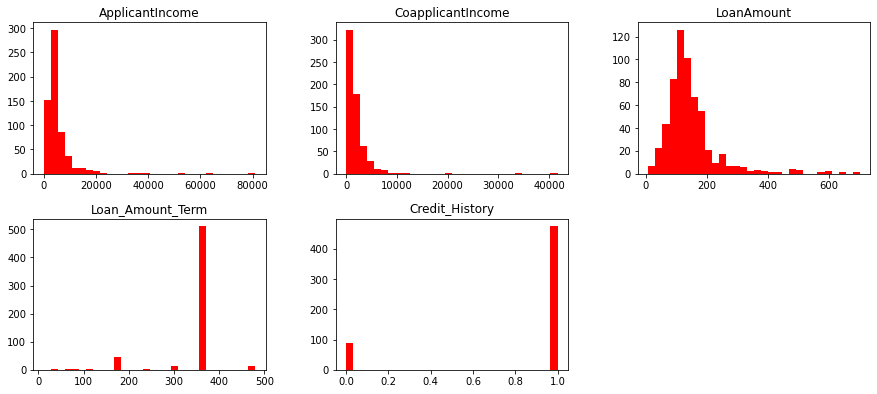

In [26]:
data.hist(figsize=(15,10), grid=False, layout=(3,3), bins = 30 , color = "red" )

# **Descriptive Analysis**

In [27]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
